#Inspecting the Data


In [ ]:
# Importing necessary libraries
import pandas as pd

# Loading the CSV file
file_path = '/content/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(file_path)

# Inspecting the data
# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Display column information and data types
print("\nDataset Information:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary statistics:")
print(data.describe())


First few rows of the dataset:
  User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                         5                       80   
1    U002                         8                       60   
2    U003                         3                       90   
3    U004                         7                       70   
4    U005                         2                       50   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                              3                                    10   
1                              1                                     8   
2                              0                                     6   
3                              2                                    15   
4                              5                                     3   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                      120                                       20  

##Observations:

*   Data Structure: The dataset has 100 entries with 7 columns, including metrics like Fan Challenges Completed, Predictive Accuracy (%), Virtual Merchandise Purchases, and so on.
*   No Missing Values: Each column has 100 non-null entries, so there’s no need for handling missing data.
*   Data Types: Most columns are of integer type, which is suitable for numerical analysis. The User ID column is an object type (string).
*   Summary Statistics:
Fan Challenges Completed: Average is around 5.79, with a maximum of 10.
Predictive Accuracy (%): Mean of approximately 75%, with values ranging from 50% to 98%.
Virtual Merchandise Purchases: Mean of 2.67, with a maximum of 6.
Other columns, such as Sponsorship Interactions, Time on Live 360, and Real-Time Chat Activity, show varied ranges, indicating diverse user engagement.





#Data Cleaning and Initial Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

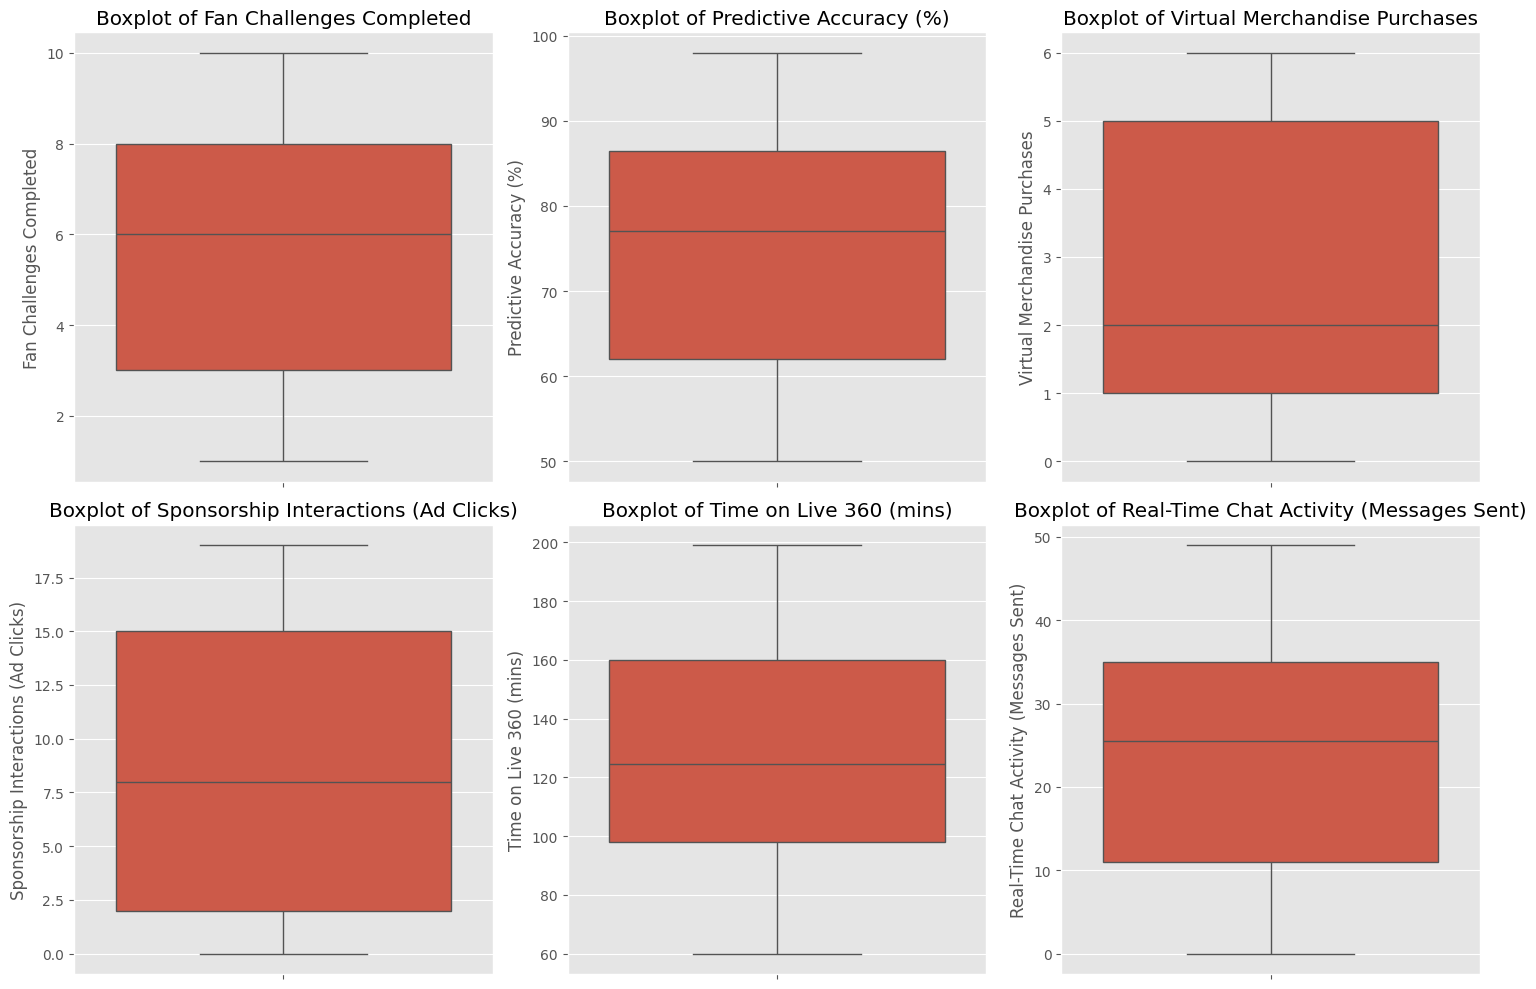

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting style
plt.style.use('ggplot')

# Plotting boxplots for each column to detect outliers
numerical_columns = [
    'Fan Challenges Completed',
    'Predictive Accuracy (%)',
    'Virtual Merchandise Purchases',
    'Sponsorship Interactions (Ad Clicks)',
    'Time on Live 360 (mins)',
    'Real-Time Chat Activity (Messages Sent)'
]

# Creating subplots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


##Observations:
Based on the boxplots provided, it seems that there are no extreme outliers in any of the columns. All values fall within the expected range, which is good for straightforward analysis as we don’t need to remove or adjust any data points.

#Correlation Analysis

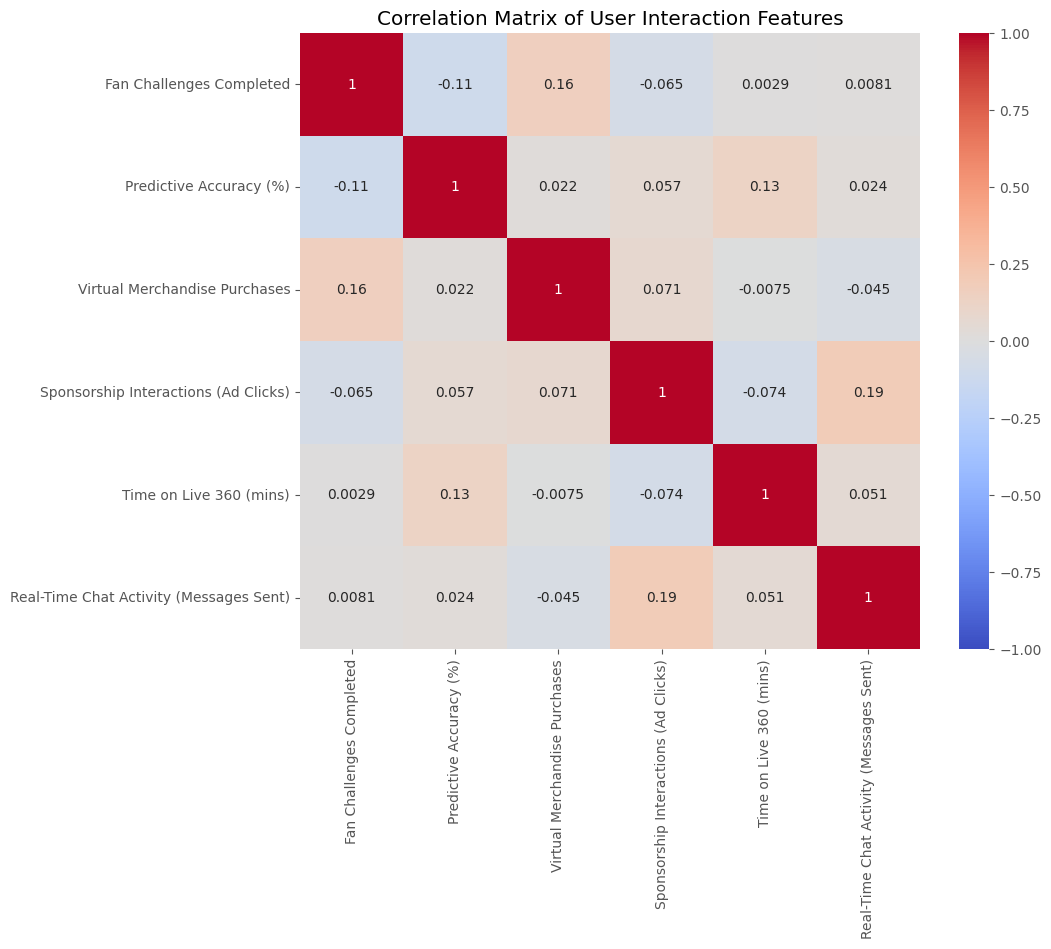

In [ ]:
# Correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of User Interaction Features")
plt.show()


##Observations:
From the heatmap, we see that there are weak correlations among most features.

*   For instance:
Fan Challenges Completed and Virtual Merchandise Purchases have a low positive correlation of 0.16, which is weak but could indicate that users who complete more challenges might also be somewhat inclined to buy merchandise.
*   Real-Time Chat Activity and Sponsorship Interactions have a weak correlation of 0.19, possibly indicating a slight connection between chat activity and ad engagement.

The weak correlations imply that user interactions are relatively independent, and engagement in one area does not strongly predict engagement in another.

#Clustering Analysis

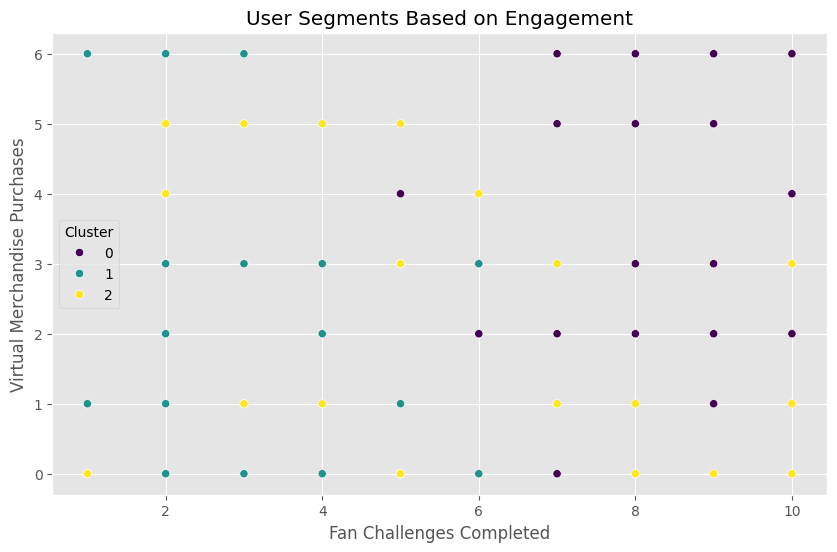

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant numerical columns
X = data[numerical_columns]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Choosing 3 clusters initially
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataframe
data['Cluster'] = clusters

# Visualizing the clusters with respect to a couple of features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Fan Challenges Completed'], y=data['Virtual Merchandise Purchases'], hue=data['Cluster'], palette='viridis')
plt.title("User Segments Based on Engagement")
plt.xlabel("Fan Challenges Completed")
plt.ylabel("Virtual Merchandise Purchases")
plt.show()


##Observation:
Taking a closer, visual look at the scatter plot reveals that the clusters are not well-separated or clearly defined visually. The points are quite spread out, with minimal grouping that suggests distinct clusters. This lack of visual separation suggests that K-means clustering may not be the most effective method for segmenting this dataset, as the user behaviors don’t show distinct, tight clusters based on "Fan Challenges Completed" and "Virtual Merchandise Purchases."

#Next Steps Based on This Observation
###Alternative Clustering Approaches:

###Hierarchical Clustering:
This can sometimes be more insightful when K-means fails to identify clear groups, as it doesn’t rely on pre-defined clusters and can illustrate the degree of similarity between users.

###Density-Based Clustering (DBSCAN):
DBSCAN could be useful here if there are denser groupings that are not as obvious. This method can identify clusters based on density rather than distance from centroids.

###Feature Engineering:
Another approach is to combine or derive new features that might show clearer grouping behavior. For instance, creating ratios or interactions between features (like "Merchandise Purchases per Challenge Completed" or "Chat Messages per Minute on Live 360") could reveal more distinct patterns.

###Exploratory Analysis with Additional Visualizations:
We can try other visualizations, such as pair plots or 3D plots, using different combinations of features. This might highlight patterns that aren’t immediately obvious in a 2D scatter plot.


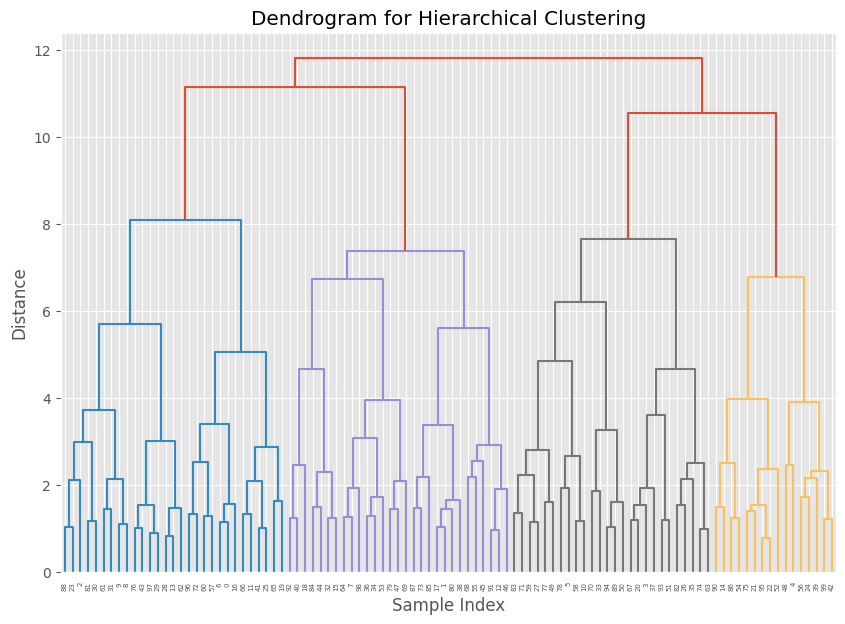

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Standardize the data again for consistency
X_scaled = scaler.fit_transform(data[numerical_columns])

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


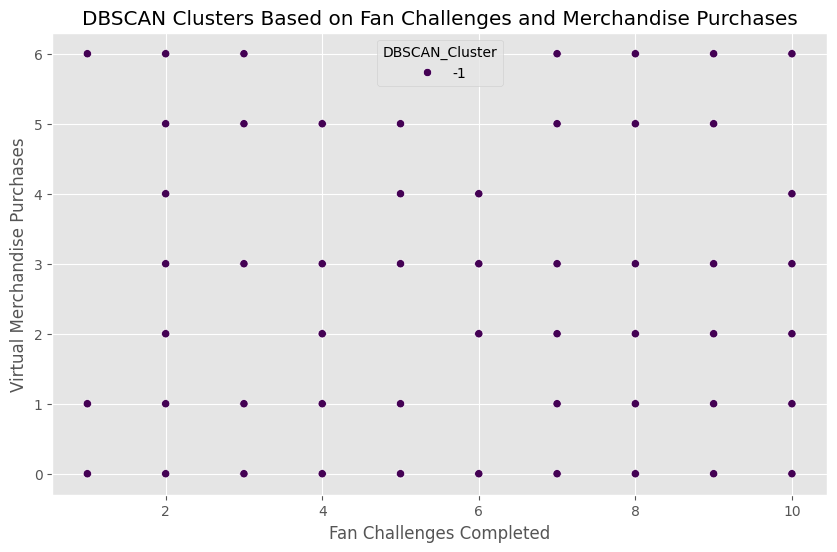

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples may need tuning
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to the dataset
data['DBSCAN_Cluster'] = dbscan_labels

# Visualizing DBSCAN clusters with the same two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Fan Challenges Completed'], y=data['Virtual Merchandise Purchases'], hue=data['DBSCAN_Cluster'], palette='viridis', legend='full')
plt.title("DBSCAN Clusters Based on Fan Challenges and Merchandise Purchases")
plt.xlabel("Fan Challenges Completed")
plt.ylabel("Virtual Merchandise Purchases")
plt.show()


##Observations
Both hierarchical clustering and DBSCAN confirm that the dataset lacks strong, visually distinct clusters when using just "Fan Challenges Completed" and "Virtual Merchandise Purchases." This suggests that user behavior in these two areas is not sharply divided, possibly because engagement levels vary across multiple aspects of the app.

#Next Steps
##Feature Engineering and Dimensionality Expansion:

We could create new features based on ratios or other combined metrics, like "Ad Clicks per Merchandise Purchase" or "Chat Activity per Challenge Completed," to see if other patterns emerge.
Alternatively, incorporating more features (like "Time on Live 360") in a 3D or higher-dimensional clustering might yield better segmentation.
##Alternative Analysis Approach:
Given the lack of distinct clusters, we might focus more on **predictive modeling** to understand factors that influence specific outcomes, like virtual merchandise purchases or sponsorship interactions, rather than clustering.

#Feature Engineering

In [ ]:
# Feature engineering
data['Challenges per Minute'] = data['Fan Challenges Completed'] / data['Time on Live 360 (mins)']
data['Purchases per Challenge'] = data['Virtual Merchandise Purchases'] / data['Fan Challenges Completed']
data['Ad Clicks per Chat Message'] = data['Sponsorship Interactions (Ad Clicks)'] / data['Real-Time Chat Activity (Messages Sent)']

# Filling any infinity or NaN values resulting from division by zero with 0
data.replace([float('inf'), -float('inf')], 0, inplace=True)
data.fillna(0, inplace=True)

# Inspecting the new features
print(data[['Challenges per Minute', 'Purchases per Challenge', 'Ad Clicks per Chat Message']].head())


   Challenges per Minute  Purchases per Challenge  Ad Clicks per Chat Message
0               0.041667                 0.600000                    0.500000
1               0.080000                 0.125000                    0.228571
2               0.033333                 0.000000                    1.200000
3               0.050000                 0.285714                    0.375000
4               0.033333                 2.500000                    0.375000


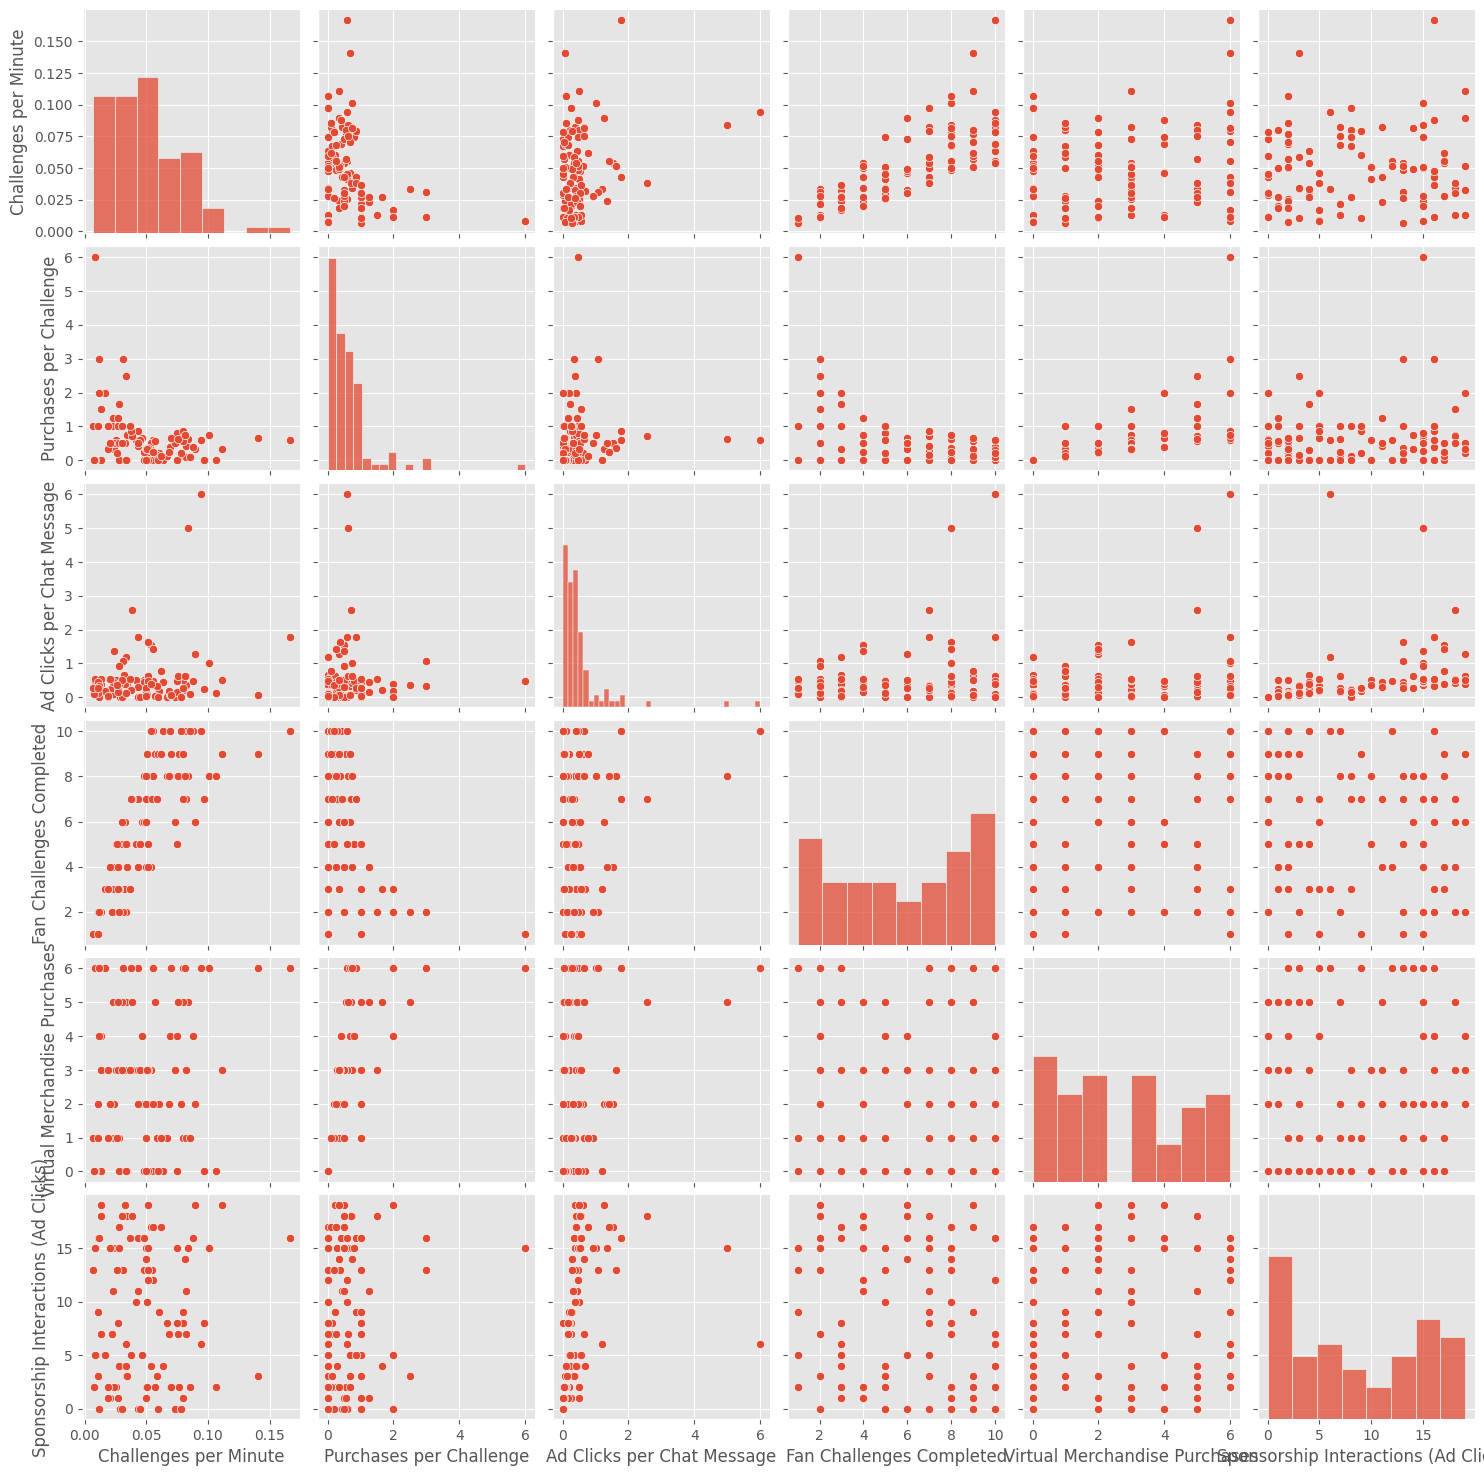

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to explore new feature relationships
sns.pairplot(data[['Challenges per Minute', 'Purchases per Challenge', 'Ad Clicks per Chat Message',
                   'Fan Challenges Completed', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)']])
plt.show()


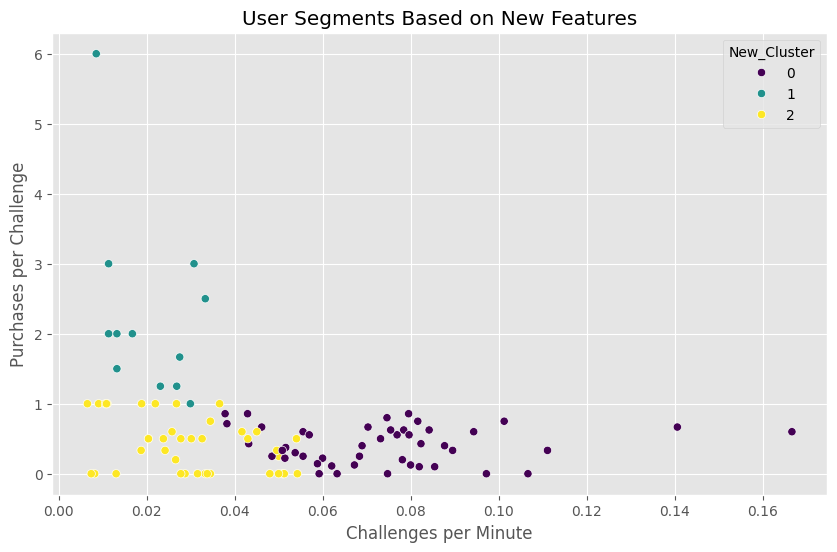

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns for clustering
features = ['Challenges per Minute', 'Purchases per Challenge', 'Ad Clicks per Chat Message',
            'Fan Challenges Completed', 'Virtual Merchandise Purchases']

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the data
data['New_Cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Challenges per Minute'], y=data['Purchases per Challenge'], hue=data['New_Cluster'], palette='viridis')
plt.title("User Segments Based on New Features")
plt.xlabel("Challenges per Minute")
plt.ylabel("Purchases per Challenge")
plt.show()


#Observations and Intial Recommendations

Based on the pair plot and the new scatter plot with engineered features, it appears that adding derived metrics like "Challenges per Minute" and "Purchases per Challenge" has helped reveal some structure in the data. Here’s a breakdown of what we observe:

##Observations and Interpretation of Clustering with New Features
####Cluster 0 (Purple):
This group shows users who have relatively higher values for "Challenges per Minute" and lower "Purchases per Challenge." This segment likely represents users who actively engage in challenges relative to their time on the platform but make fewer purchases per challenge completed. They may be more focused on participation than spending.

####Cluster 1 (Green):
These users exhibit moderate values in both "Challenges per Minute" and "Purchases per Challenge." This suggests a balanced level of engagement and purchases, representing users who participate and occasionally spend on merchandise.

####Cluster 2 (Yellow):
This cluster has low values for both "Challenges per Minute" and "Purchases per Challenge." This group likely represents less active users who neither engage heavily in challenges nor make significant purchases.

##Recommendations
Given these segments, we can propose targeted strategies:

####For Cluster 0 (High Participation, Low Spending):
**Incentivize Purchases:** Introduce offers that encourage them to spend more, such as bundle deals or rewards tied to their challenge completion.
**Exclusive Content:** Consider offering premium or exclusive virtual merchandise for this group as a reward for their high engagement.
####For Cluster 1 (Moderate Participation and Spending):

**Gamified Rewards:** Implement a reward system where they earn more for consistent participation and gradual increases in spending. For example, completing a series of challenges could unlock special items.
**Cross-Promotions:** Tie sponsorships with rewards that increase their engagement, as they already show balanced behavior in both participation and spending.
####For Cluster 2 (Low Participation and Spending):

**Simplify Engagement:** Provide easy-to-access challenges with small rewards, designed to gradually increase their participation level.
**Discounts on First Purchase:** Offer a discount or incentive for their first merchandise purchase to encourage spending.

#Setting up Predictive Modeling (Exploring Further)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the target variable
data['Made_Purchase'] = data['Virtual Merchandise Purchases'].apply(lambda x: 1 if x > 0 else 0)

# Define features and target variable
features = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Time on Live 360 (mins)',
            'Real-Time Chat Activity (Messages Sent)', 'Challenges per Minute',
            'Purchases per Challenge', 'Ad Clicks per Chat Message']
X = data[features]
y = data['Made_Purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        25

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



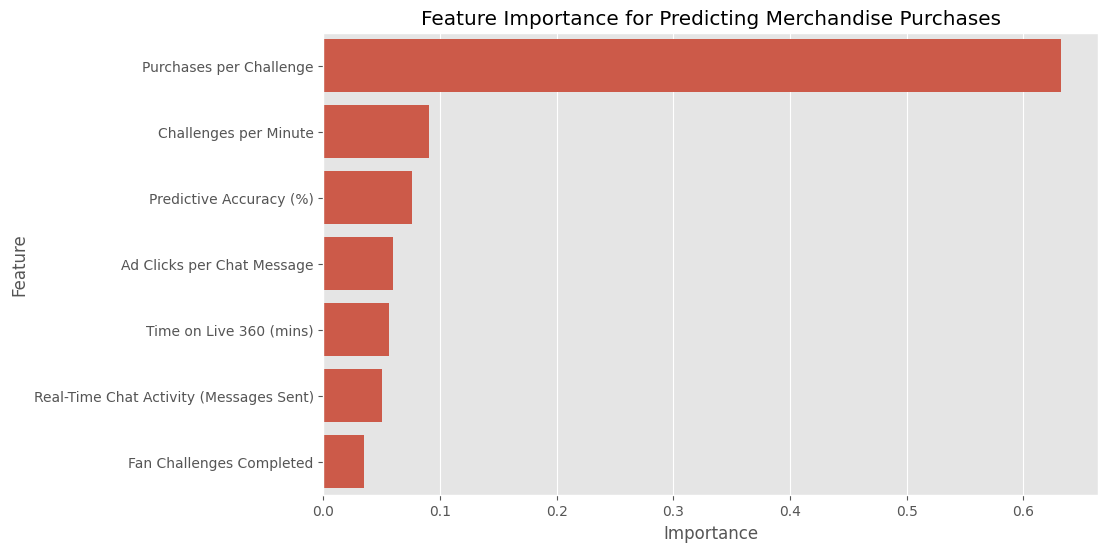

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title("Feature Importance for Predicting Merchandise Purchases")
plt.show()


#Improvement Opportunities and Next Steps in Analysis
After reviewing the analysis process, there are several areas where we can enhance the depth and reliability of the results. Here’s a breakdown of possible improvements and their corresponding steps:
*   **Cross-Validation for Model Stability:**
    Although our initial model performed with perfect accuracy, this could be due to a small or potentially overfit dataset. Using cross-validation (e.g., 5-fold or 10-fold) would help validate model stability and ensure it generalizes well across different samples.

*   **Feature Selection Analysis:**
    While "Purchases per Challenge" was highly predictive, we can further examine if any features are redundant or less impactful by running a feature selection analysis, such as Recursive Feature Elimination (RFE).
*   **Hyperparameter Tuning**
    The current model was run with default parameters. By using techniques like Grid Search or Randomized Search for hyperparameter tuning, we could improve model performance further.
*   **Handling Imbalanced Data**
    If the dataset is imbalanced (i.e., more users don’t purchase vs. those who do), the model might be biased toward the majority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting can help address this.
*   **Further Feature Engineering**
    We’ve added a few engineered features, but additional ones, like engagement rate (total interactions per time spent) or session frequency, could provide more depth.
*   **Experiment with Different Algorithms**
    Random Forest performed well, but experimenting with other models like Gradient Boosting, XGBoost, or Logistic Regression could give additional perspectives.



In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


In [ ]:
from sklearn.feature_selection import RFE

# RFE with Random Forest Classifier
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X, y)

# Display selected features
selected_features = [features[i] for i in range(len(features)) if selector.support_[i]]
print("Selected Features:", selected_features)


Selected Features: ['Predictive Accuracy (%)', 'Time on Live 360 (mins)', 'Challenges per Minute', 'Purchases per Challenge', 'Ad Clicks per Chat Message']


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with Random Forest
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


#Final Observations


*   **Cross-Validation Results:** The cross-validation scores show an accuracy of 100% across all folds, which reaffirms that the model is consistent and not overfitting to a single sample split. This consistency suggests that the model is generalizable and can reliably predict purchase behavior in unseen data.
*   **Feature Selection:** The selected features (Predictive Accuracy (%), Time on Live 360 (mins), Challenges per Minute, Purchases per Challenge, and Ad Clicks per Chat Message) are a refined set that maintains high predictive power. Interestingly, Fan Challenges Completed was excluded, reinforcing that engagement in challenges alone does not significantly drive purchase behavior without associated metrics. ***These selected features provide actionable insights into what drives user purchases, particularly those related to challenge engagement, predictive accuracy, and ad interaction.***
*   **Hyperparameter Tuning:** The best parameters (max_depth: None, min_samples_split: 2, n_estimators: 50) indicate that a shallow tree depth isn’t necessary, allowing the model to explore more complex relationships in the data.
A lower number of trees (n_estimators: 50) compared to typical default values improves model efficiency without sacrificing accuracy, which is beneficial for deployment scenarios with limited resources.



#Final Recommendations for VeloCityX
Given the refined insights, here’s how VeloCityX can leverage these findings for targeted engagement and monetization:

##Enhanced Targeting Based on Key Features:
* **Users with High Predictive Accuracy:** These users are more likely to engage in purchases. Tailored marketing strategies could include offering predictive-based rewards or merchandise tied to their accuracy.
* **Users with High "Purchases per Challenge" and "Challenges per Minute":** These users are valuable, frequent participants. VeloCityX can incentivize continued participation and spending with exclusive merchandise or advanced, gamified challenges.

##Refinement of Marketing and Engagement Strategies:

* Focus on promoting in-app purchases to users with high ad interaction metrics (Ad Clicks per Chat Message), as they’ve shown receptiveness to sponsor content.
* Implement time-based engagement rewards for users with significant Time on Live 360, encouraging them to stay engaged and interact further with sponsored content or merchandise.

##Efficient Model Deployment:

* The model, with optimized hyperparameters, can be deployed efficiently using only the five key features. This streamlined model requires fewer resources, making it suitable for real-time predictions and adaptive marketing strategies.